# Recitation 11: Spherical Harmonics

Author: Tri Nguyen

This recitation introduces spherical harmonics.

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D
from scipy.special import sph_harm

%matplotlib inline

mpl.rcParams['font.size'] = 16

In [2]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>

# Background

## Laplace's equation in spherical coordinate

Let our coordinate system be $(r, \theta, \phi)$ where $r$ is the radius, $\theta$ is the polar angle ($0 \leq \theta \leq \pi)$ , and $\phi$ is the azimuthal angle $(0 \leq \phi \leq 2\pi)$.
We want to solve the Laplace's equation for a scalar function $\Psi = \Psi(r, \theta, \phi)$:

\begin{equation}
    \nabla^2 \Psi = 0 
\end{equation}

As a reminder, the Laplacian $\nabla^2$ (or also $\Delta$) is the divergence of the gradient.
We often encounter the Laplace's equation in many areas of physics. 
For example:

1. $\nabla^2 V = 0$ for $\mathbf{E} = -\nabla V$ where $\mathbf{E}$ is the electric field and $V$ is the electric potential

2. $\nabla^2 \phi = 0$ for $\mathbf{g} = -\nabla \phi$ where $\mathbf{g}$ is the gravitational field and $\phi$ is the gravitational potential

and so on.

In physics, we often find that we can separate the solution $\Psi$ into a radial component $R(r)$ and an angular component $Y(\theta, \phi)$, i.e. $\Psi(r, \theta, \phi) = R(r) Y(\theta, \phi)$.
Then, the Laplace's equation becomes:

\begin{equation}
    \frac{1}{R}\frac{d}{dr}\left(r^2 \frac{dR}{dr}\right) = l(l+1) , \quad 
    \frac{1}{Y}\frac{1}{\sin\theta} \frac{\partial}{\partial\theta}
    \left(\sin\theta\frac{\partial Y}{\partial \theta}\right) 
    + \frac{1}{Y} \frac{1}{\sin^2\theta} \frac{\partial^2 Y}{\partial \phi^2} 
    = -l(l + 1)
\end{equation}

where we let the separation constant to be $l(l+1)$ by convention.

## Spherical harmonics

In this recitation, we will ignore the radial equation and focus on the angular equation.
To solve for the angular equation, we again apply separation of variables by assuming that $Y$ has the form $Y(\theta, \phi) = \Theta(\theta) \Phi(\phi)$:

\begin{equation}
    \label{eq:laplace_azi}
    \frac{1}{\Phi} \frac{d^2\Phi}{d\phi^2} = -m^2
\end{equation}

\begin{equation}
    \label{eq:laplace_polar}
    l(l+1)\sin^2\theta 
    + \frac{\sin\theta}{\Theta}\frac{d}{d\theta}\left(\sin\theta \frac{d\Theta}{d\theta}\right)
    = m^2
\end{equation}

where we let our second separation constant to be $m^2$ by convention.

### The azimuthal equation

The azimuthal equation (Eq. \ref{eq:laplace_azi}) has a simple solution:

\begin{equation}
    \label{eq:sol_azi}
    \frac{1}{\Phi} \frac{d^2\Phi}{d\phi^2} = -m^2 \Rightarrow \Phi(\phi) = e^{im\phi}
\end{equation}

Here, we have simplied the solution by allowing $m$ to have negative values. 

> **QUESTION:** 
Proof that $m$ must also be an integer.

> **ANSWER:**
The azimuthal solution $\Phi$ repeats itself every $2\pi$, i.e.:
\begin{align*}
    &\Phi(\phi + 2\pi) = \Phi(\phi) \\
    \Rightarrow \, & \exp(i m(\phi + 2\pi)) = \exp(2\pi i m) \\
    \Rightarrow \, & \exp(2\pi i m) = 1
\end{align*}
So $m$ must be an integer.

### The polar equation
The polar equation (Eq. \ref{eq:laplace_polar}) is a bit more complicated, so we will just show the solution here:

\begin{equation}
    \label{eq:sol_polar}
    \Theta(\theta) = P^m_l(\cos\theta)
\end{equation}

where $P^m_l$ is the *associcated Legendre function*:

\begin{equation}
    P^m_l(x) = \frac{(-1)^m}{2^l l!}(1-x^2)^{m/2} \frac{d^{l+m}}{dx^{l+m}} (x^2 - 1)^l
\end{equation}

which is non-zero for non-negative $l$ and $-l \leq m \leq l$.
The factor $(-1)^m$ is the Condon and Shortley phase factor convention, which is convenient in quantum mechanics (e.g. angular momentum ladder operator).
This is the convention used Scipy: see [`scipy.special.lpmv`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.lpmv.html#scipy.special.lpmv).


### Final solution
Combining the azimuthal and polar solutions (Eq. \ref{eq:sol_azi} and Eq. \ref{eq:sol_polar}),
we have the solution for the angular Laplace's equation:

\begin{equation}
    \boxed{Y^m_l(\theta, \phi) 
    = \sqrt{\frac{(2l + 1)}{4\pi} \frac{(l-m)!}{(l+m)!}} e^{i m \phi} P^m_l(\cos\theta)}
\end{equation}

for $l = 0, 1, 2,...$ and $m = -l, -l + 1, ..., l - 1, l$. 
The functions $Y^m_l (\theta, \phi)$ are known as the **spherical harmonics**. 
The first term of $Y^m_l$ is the normalization constant chosen such that:

\begin{equation}
    \int _0^{2\pi}\int_{-1}^{1} \left|Y^m_l(\theta, \phi)\right|^2 d(\cos\theta) d\phi = 1
\end{equation}


> **QUESTION:**
What is the relation between $P^m_l$ and $P^{-m}_l$? What is the relation between $Y^m_l$ and $Y^{-m}_l$ then?

> **ANSWER:**
It is straight-forward to show that:
\begin{equation*}
    P^{-m}_ l(\cos\theta) = (-1)^m \frac{(l-m)!}{(l+m)!} P^m_l(\cos\theta)
\end{equation*}
which leads to:
\begin{equation*}
    Y^m_l(\theta, \phi) = (-1)^m Y^{-m}_ l(\theta, \phi)^\ast
\end{equation*}
where $\ast$ denotes the complex conjugate.

**Example**: the first few spherical harmonics (with Condon-Shortley convention):
\begin{gather*}
   Y^0_0(\theta, \phi) = \sqrt{\frac{1}{4\pi}} \\
   Y^0_1(\theta, \phi) = \sqrt{\frac{3}{4\pi}} \cos\theta, \quad
   Y^1_1(\theta, \phi) = -\sqrt{\frac{3}{8\pi}} e^{i\phi} \sin\theta  \\
   Y^0_2(\theta, \phi) = \sqrt{\frac{5}{16\pi}} (3\cos^2\theta - 1), \quad
   Y^1_2(\theta, \phi) = - \sqrt{\frac{15}{8\pi}} e^{i\phi} \sin\theta \cos\theta, \quad
   Y^2_2(\theta, \phi) = - \sqrt{\frac{15}{8\pi}} e^{2i\phi} \sin^2\theta, \quad
\end{gather*}

### Important properties

Spherical harmonics form an **orthonormal basis**:

1. Orthonormal:

\begin{equation}
    \int _0^{2\pi}\int_ {-1}^{1} Y^m_l(\theta, \phi)Y^{m'}_ {l'}(\theta, \phi) d(\cos\theta) d\phi 
    = \delta_{l l'} \delta_{m m'}
\end{equation}

where $\delta_{ij}$ is the Kronecker delta ($\delta_{ij} = 1$ for $i = j$ and $0$ otherwise).

2. Completeness: 
$Y^m_l$ forms a complete basis of square-integrable functions: $\exp(i m \phi)$ and the associated Legendre polynomials $P^m_l(\cos\theta)$ are both complete. 

For an well-behave function $f(\theta, \phi)$ on a unit sphere, we can write it as:

\begin{equation}
    f(\theta, \phi) = \sum^\infty_{l=0} \sum^l_{m=-l} a^m_l Y^m_l (\theta, \phi)
\end{equation}

where $a^m_l$ are some *complex* cofficients dependent on $(m, l$)

> **QUESTION:**
Given a function $f(\theta, \phi)$, how would you find $a^m_l$?

> **ANSWER:**
The cofficient $a^m_l$ can be found using the orthonormal property:
\begin{align}
    \int f(\theta, \phi) Y ^{m'}_ {l'}(\theta, \phi)^\ast d\Omega
    = \sum^\infty_{l=0} \sum^l_{m=-l} a^m_l \int Y^m_l (\theta, \phi) Y ^{m'}_ {l'}(\theta, \phi)^\ast d\Omega 
    = \sum^\infty_{l=0} \sum^l_{m=-l} a^m_l \delta_{l l'} \delta_{m m'} = a^{m'}_ {l'}
\end{align}
where $d\Omega = d(\cos\theta) d\phi$ is the unit angle.

# Plotting spherical harmonics in Python

In this section, we show how to plot the spherical harmonics using Scipy and Matplotlib.

Because Scipy uses a different angle convention than what we previously introduced ($\phi$ as polar angle and $\theta$ as the azimuthal angle), we will re-define its spherical harmonic function to match our convention, which is more commonly used in physics.

In [3]:
def Yml(m, l, theta, phi):
    ''' Returns the spherical harmonics Y^m_l(theta, phi) including the Condon-Shortley phase
    where theta is the polar angle (in rad) and phi is the azimuthal angle (in rad).
    '''
    return sph_harm(m, l, phi, theta)    

In [4]:
def plot_spherical_harmonics(m, l, ax, mode='real'):
    ''' Plot spherical harmonics Y^m_l (theta, phi)
    where theta is the polar angle (in rad) and phi is the azimuthal angle (in rad).
    
    Args:
    - m, l (int, int):  spherical harmonics number
    - ax (matplotlib.pyplot.axis): axis to plot
    - mode (str): either "real" or "imag". Default is "real"
    Returns:
    - fig (matplotlib.pyplot.figure): returns if ax is not given
    '''
    
    # Define an angular grid over a unit sphere
    phi = np.linspace(0, 2*np.pi, 100)
    theta = np.linspace(0, np.pi, 100)
    phi, theta = np.meshgrid(phi, theta)
    
    # The Cartesian coordinates of the unit sphere
    x = np.sin(theta) * np.cos(phi)
    y = np.sin(theta) * np.sin(phi)
    z = np.cos(theta)

    # Calculate the spherical harmonic Y(l,m)
    if mode == 'real':
        fcolors = Yml(m, l, theta, phi).real
    elif mode == 'imag':
        fcolors = Yml(m, l, theta, phi).imag
    else:
        raise ValueError('mode must either be "real" or "imag"')
    fmax, fmin = fcolors.max(), fcolors.min()
    fcolors = (fcolors - fmin)/(fmax - fmin)

    # Set the aspect ratio to 1 so our sphere looks spherical
    cmap = cm.ScalarMappable(cmap=plt.get_cmap('seismic'))
    ax.plot_surface(x, y, z,  rstride=1, cstride=1, facecolors=cmap.to_rgba(fcolors))

As an example, we will now plot the first two $l=1, 2$ ($l=0$ case is just a constant):

1. Plot $l=1$ case:

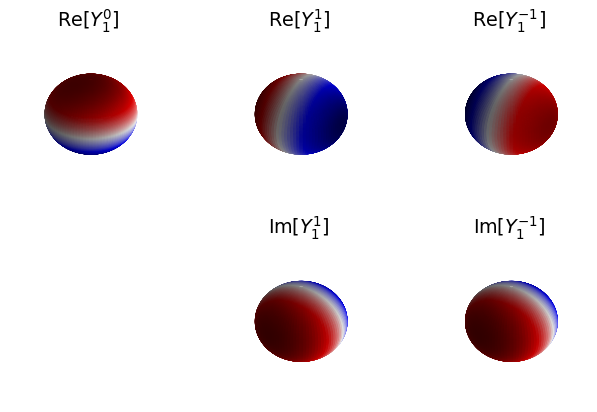

In [5]:
fig, axes = plt.subplots(2, 3, figsize=(9, 6), subplot_kw={'projection': '3d'})

# Plot m, l = 0, 1
plot_spherical_harmonics(0, 1, axes[0, 0], 'real')
axes[0, 0].set_title(r'Re[$Y^0_1$]')

# Plot m, l = 1, 1
plot_spherical_harmonics(1, 1, axes[0, 1], 'real')
plot_spherical_harmonics(1, 1, axes[1, 1], 'imag')
axes[0, 1].set_title(r'Re[$Y^1_1$]')
axes[1, 1].set_title(r'Im[$Y^1_1$]')

# Plot m, l = -1, 1
plot_spherical_harmonics(-1, 1, axes[0, 2], 'real')
plot_spherical_harmonics(-1, 1, axes[1, 2], 'imag')
axes[0, 2].set_title(r'Re[$Y^{-1}_1$]')
axes[1, 2].set_title(r'Im[$Y^{-1}_1$]')

# Turn off axis
for ax in axes.ravel():
    ax.axis('off')

fig.tight_layout()

2. Plot $l=2$ case:

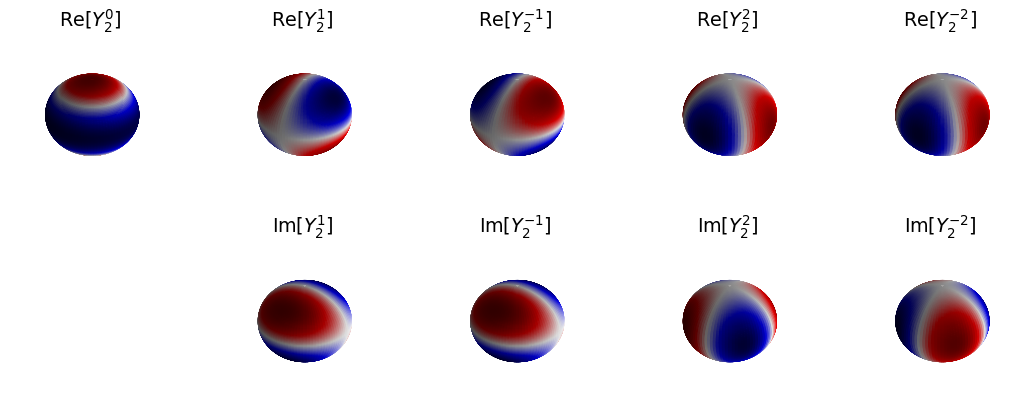

In [6]:
fig, axes = plt.subplots(2, 5, figsize=(15, 6), subplot_kw={'projection': '3d'})

# Plot m, l = 0, 2
plot_spherical_harmonics(0, 2, axes[0, 0], 'real')
axes[0, 0].set_title(r'Re[$Y^0_2$]')

# Plot m, l = 1, 2
plot_spherical_harmonics(1, 2, axes[0, 1], 'real')
plot_spherical_harmonics(1, 2, axes[1, 1], 'imag')
axes[0, 1].set_title(r'Re[$Y^1_2$]')
axes[1, 1].set_title(r'Im[$Y^1_2$]')

# Plot m, l = -1, 2
plot_spherical_harmonics(-1, 2, axes[0, 2], 'real')
plot_spherical_harmonics(-1, 2, axes[1, 2], 'imag')
axes[0, 2].set_title(r'Re[$Y^{-1}_2$]')
axes[1, 2].set_title(r'Im[$Y^{-1}_2$]')

# Plot m, l = 2, 2
plot_spherical_harmonics(2, 2, axes[0, 3], 'real')
plot_spherical_harmonics(2, 2, axes[1, 3], 'imag')
axes[0, 3].set_title(r'Re[$Y^2_2$]')
axes[1, 3].set_title(r'Im[$Y^2_2$]')

# Plot m, l = -2, 2
plot_spherical_harmonics(-2, 2, axes[0, 4], 'real')
plot_spherical_harmonics(-2, 2, axes[1, 4], 'imag')
axes[0, 4].set_title(r'Re[$Y^{-2}_2$]')
axes[1, 4].set_title(r'Im[$Y^{-2}_2$]')

# Turn off axis
for ax in axes.ravel():
    ax.axis('off')

fig.tight_layout()

We can also visualize the spherical harmonics in a different way.

In [10]:
def plot_spherical_harmonics_alt(m, l, ax, mode):
    ''' Plot spherical harmonics Y^m_l (theta, phi)
    where theta is the polar angle (in rad) and phi is the azimuthal angle (in rad).
    
    Args:
    - m, l (int, int):  spherical harmonics number
    - ax (matplotlib.pyplot.axis): axis to plot
    Returns:
    - fig (matplotlib.pyplot.figure): returns if ax is not given
    '''
    
    # Define an angular grid over a unit sphere
    phi = np.linspace(0, 2*np.pi, 100)
    theta = np.linspace(0, np.pi, 100)
    phi, theta = np.meshgrid(phi, theta)
    
    # The Cartesian coordinates of the unit sphere
    x = np.sin(theta) * np.cos(phi)
    y = np.sin(theta) * np.sin(phi)
    z = np.cos(theta)

    # Calculate the spherical harmonic Y(l,m) and normalize to [-1,1]
    if mode == 'real':
        Y = Yml(m, l, theta, phi).real
    elif mode == 'imag':
        Y = Yml(m, l, theta, phi).imag
    else:
        raise ValueError('mode must either be "real" or "imag"')    
    Yx = np.abs(Y) * x
    Yy = np.abs(Y) * y
    Yz = np.abs(Y) * z
        
    # Set the aspect ratio to 1 so our sphere looks spherical
    cmap = cm.ScalarMappable(cmap=plt.get_cmap('seismic'))
    ax.plot_surface(Yx, Yy, Yz,  rstride=1, cstride=1, facecolors=cmap.to_rgba(Y))

1. Plot $l=1$ case:

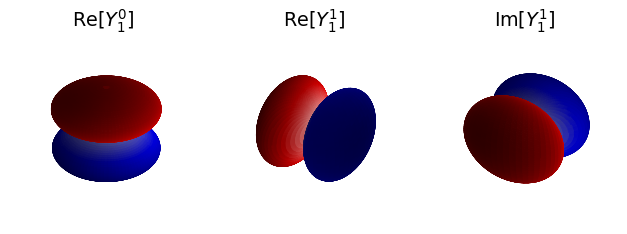

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(9, 10), subplot_kw={'projection': '3d'})

# Plot m, l = 0, 1
plot_spherical_harmonics_alt(0, 1, axes[0], 'real')
axes[0].set_title(r'Re[$Y^0_1$]')

# Plot m, l = 1, 1
plot_spherical_harmonics_alt(1, 1, axes[1], 'real')
plot_spherical_harmonics_alt(1, 1, axes[2], 'imag')
axes[1].set_title(r'Re[$Y^1_1$]')
axes[2].set_title(r'Im[$Y^1_1$]')

# Turn off axis
for ax in axes.ravel():
    ax.axis('off')

fig.tight_layout()

2. Plot $l=2$ case:

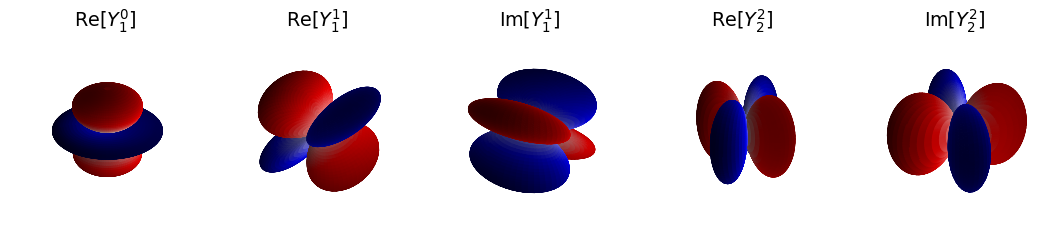

In [9]:
fig, axes = plt.subplots(1, 5, figsize=(15, 10), subplot_kw={'projection': '3d'})

# Plot m, l = 0, 1
plot_spherical_harmonics_alt(0, 2, axes[0], 'real')
axes[0].set_title(r'Re[$Y^0_1$]')

# Plot m, l = 1, 1
plot_spherical_harmonics_alt(1, 2, axes[1], 'real')
plot_spherical_harmonics_alt(1, 2, axes[2], 'imag')
axes[1].set_title(r'Re[$Y^1_1$]')
axes[2].set_title(r'Im[$Y^1_1$]')

# Plot m, l = 1, 1
plot_spherical_harmonics_alt(2, 2, axes[3], 'real')
plot_spherical_harmonics_alt(2, 2, axes[4], 'imag')
axes[3].set_title(r'Re[$Y^2_2$]')
axes[4].set_title(r'Im[$Y^2_2$]')

# Turn off axis
for ax in axes.ravel():
    ax.axis('off')

fig.tight_layout()